SIN-392 - Introdução ao Processamento Digital de Imagens (2022-1)

# Aula 13 - A Transformada de Fourier

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bibliotecas-necessárias" data-toc-modified-id="Importando-as-bibliotecas-necessárias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bibliotecas necessárias</a></span></li><li><span><a href="#Criando-um-sinal-simples" data-toc-modified-id="Criando-um-sinal-simples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Criando um sinal simples</a></span><ul class="toc-item"><li><span><a href="#Plotando-o-sinal" data-toc-modified-id="Plotando-o-sinal-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plotando o sinal</a></span></li></ul></li><li><span><a href="#A-Transformada-discreta-de-Fourier" data-toc-modified-id="A-Transformada-discreta-de-Fourier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>A Transformada discreta de Fourier</a></span><ul class="toc-item"><li><span><a href="#Calcula-a-DFT-de-uma-função-simples." data-toc-modified-id="Calcula-a-DFT-de-uma-função-simples.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Calcula a DFT de uma função simples.</a></span><ul class="toc-item"><li><span><a href="#Compara-os-resultados-da-transformada-discreta-de-Fourier-com-a-FFT-(NumPy)" data-toc-modified-id="Compara-os-resultados-da-transformada-discreta-de-Fourier-com-a-FFT-(NumPy)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Compara os resultados da transformada discreta de Fourier com a FFT (NumPy)</a></span></li><li><span><a href="#Compara-os-tempos-de-execução" data-toc-modified-id="Compara-os-tempos-de-execução-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Compara os tempos de execução</a></span></li></ul></li><li><span><a href="#Aplicando-a-Transformada-de-Fourier-sobre-um-sinal-1D" data-toc-modified-id="Aplicando-a-Transformada-de-Fourier-sobre-um-sinal-1D-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Aplicando a Transformada de Fourier sobre um sinal 1D</a></span></li></ul></li><li><span><a href="#Criando-um-sinal-mais-complexo" data-toc-modified-id="Criando-um-sinal-mais-complexo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Criando um sinal mais complexo</a></span><ul class="toc-item"><li><span><a href="#Plotando-o-sinal" data-toc-modified-id="Plotando-o-sinal-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plotando o sinal</a></span></li></ul></li><li><span><a href="#Calculando-a-Transformada-de-Fourier-do-sinal" data-toc-modified-id="Calculando-a-Transformada-de-Fourier-do-sinal-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculando a Transformada de Fourier do sinal</a></span><ul class="toc-item"><li><span><a href="#Filtrando-as-altas-frequencias-(filtragem-passa-baixa)" data-toc-modified-id="Filtrando-as-altas-frequencias-(filtragem-passa-baixa)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Filtrando as altas frequencias (filtragem passa-baixa)</a></span></li><li><span><a href="#Filtrando-as-baixas-frequencias-(filtragem-passa-alta)" data-toc-modified-id="Filtrando-as-baixas-frequencias-(filtragem-passa-alta)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Filtrando as baixas frequencias (filtragem passa-alta)</a></span></li></ul></li><li><span><a href="#Bibliografia" data-toc-modified-id="Bibliografia-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bibliografia</a></span></li></ul></div>

## Importando as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np
from numpy import fft

import matplotlib.pyplot as plt

## Criando um sinal simples
----

* Um sinal senoidal com frequência de 10 Hz, amplitude de 1 e duração de 4 segundos.
* O sinal foi amostrado a uma taxa de 100 amostras por segundo.

In [2]:
# Frequencia do sinal, em Hz (ciclos por segundos)
freq_signal = 10 

# Taxa de amostragem. Número de amostras por segundo
taxa_amostragem = 100 

# Frequencia de amostragem
freq_amostragem = 1 / taxa_amostragem

# Duração do sinal (em segundos)
duracao_sinal = 2

# Numero de amostras
num_amostras = duracao_sinal * taxa_amostragem

# Eixo do tempo (em segundos)
tempo = np.linspace(0, duracao_sinal, num_amostras, endpoint=False)

# Sinal senoidal 
sinal = np.sin(freq_signal * 2*np.pi * tempo)

### Plotando o sinal

<IPython.core.display.Javascript object>


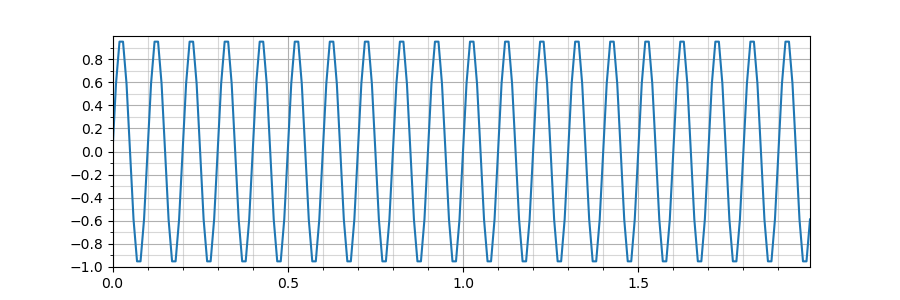

In [3]:
fig = plt.figure(figsize=(9, 3))
plt.plot(tempo, sinal)

plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 2.0, 0.5))
ax.set_xticks(np.arange(0, 2.0, 0.1), minor=True)
ax.set_yticks(np.arange(-1, 1.0, 0.2), minor=False)
ax.set_yticks(np.arange(-1, 1.0, 0.1), minor=True)
## ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(-1, 1)

## plt.axis('equal')
plt.show()

## A Transformada discreta de Fourier
----

* Transformada Discreta de Fourier 1D:
<font size="5">
$$F(u) = \sum_{x=0}^{M-1}{f(x)e^{-j2 \pi ux \over{M}}}$$
</font>
<br />
<br />
* Transformada Inversa de Fourier Discreta 1D:
<font size="5">
$$f(x) = {1 \over{M}} \sum_{u=0}^{M-1}{F(u)e^{j2 \pi ux \over{M}}}$$
</font>

In [4]:
def DFT_slow(fx):
    """Calcula a transformada discreta de Fourier de uma função f_x.
    
    References
    ----------
    - https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
    """
    # Garante que o sinal f(x) esta em um arranjo NumPy do tipo float
    fx = np.array(fx, dtype=float)
    
    # Tamanho do sinal (número de amostras)
    M = fx.shape[0]
    
    # Eixo do tempo. 0 até M
    x = np.arange(M)
    ### print('x: ' + str(x))
    
    # Eixo da frequencia (em Hz - ciclos por segundo)
    u = x.reshape((M, 1))
    ### print('u: ' + str(u.shape))
    
    M = np.exp(-1j * 2 * np.pi * u * x / M)
    ### print('M')
    ### print(M)
    
    # Produto interno entre M e f(x)
    dft = np.dot(M, fx)
    ### print('dft')
    ### print(dft)
    
    return dft

### Calcula a DFT de uma função simples.


[5.40000000e+01 3.27844930e-15 3.94324822e+00 4.13176028e-15
 4.47213595e+00 1.24745797e-14 1.62619431e+01 1.24844567e-14
 6.00000000e+00 2.37629227e-14 1.62619431e+01 3.62483992e-14
 4.47213595e+00 2.16308373e-14 3.94324822e+00 9.11119797e-14]


<IPython.core.display.Javascript object>


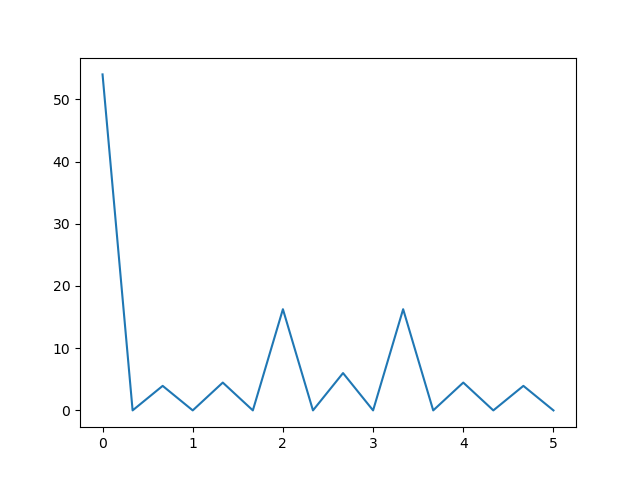

In [5]:
# Executando para um sinal simples
a=[4, 2, 3, 6, 1, 5, 4, 2, 4, 2, 3, 6, 1, 5, 4, 2]

# Número de amostras
M = len(a)

# Frequencia de amostragem
freq = 1 / 10 # 10 amostras por segundo

# Eixo y (F(u))
b_y = DFT_slow(a)

# Espectro de Fourier. |F(u)|
print(np.abs(b_y))

# Eixo x (u)
### b_x = np.linspace(0, 1/(2 * (1/10)), 16)
b_x = np.linspace(0, 1/(2 * freq), M)

plt.figure()
plt.plot(b_x, np.abs(b_y))

plt.show()

#### Compara os resultados da transformada discreta de Fourier com a FFT (NumPy)

In [6]:
# Transformada de Fourier Discreta (slow)
x_slow = DFT_slow(sinal)

# Transformada Rápida de Fourier (FFT - Fast Fourier Transform)
x_np = np.fft.fft(sinal)

# Verifica se os sinais são semelhantes.
np.allclose(x_slow, x_np)

True

#### Compara os tempos de execução

In [7]:
# Transformada de Fourier Discreta (slow)
%timeit DFT_slow(sinal)

# Transformada Rápida de Fourier (FFT - Fast Fourier Transform)
%timeit np.fft.fft(sinal)

4.79 ms ± 624 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.21 µs ± 429 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Aplicando a Transformada de Fourier sobre um sinal 1D

* Usando a implementação presente no NumPy

<IPython.core.display.Javascript object>


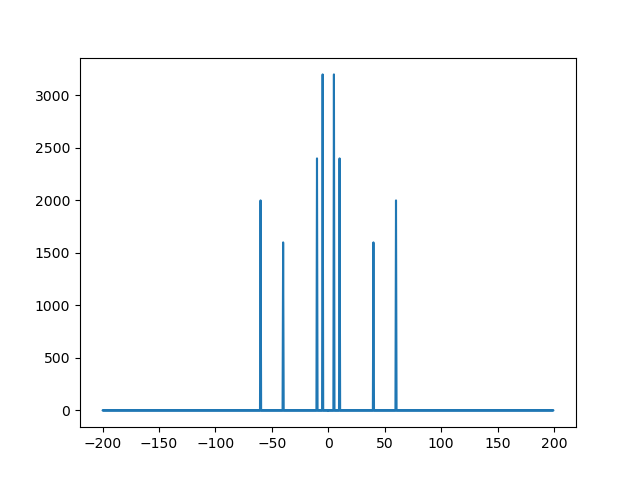

In [17]:
sinal_fft_y = fft.fft(sinal)
sinal_fft_x = fft.fftfreq(num_amostras, freq_amostragem)

plt.figure()
plt.plot(sinal_fft_x, np.abs(sinal_fft_y))
plt.show()

## Criando um sinal mais complexo
----
- Vamos criar um sinal mais complexo, composto pela soma de três sinais senoidais com amplitudes e frequências diferentes.
    - Sinal 1: 
        - Frequencia: 5 Hz
        - Amplitude: 8
    - Sinal 2:
        - Frequencia: 20 Hz
        - Amplitude: 6
    - Sinal 3: 
        - Frequencia: 60 Hz
        - Amplitude: 4
    - Sinal 4: 
        - Frequencia: 80 Hz
        - Amplitude: 5

In [18]:
# Frequencia dos sinais, em Hz (ciclos por segundos)
freq_signal_list = [5, 10, 40, 60] 

# Lista de amplitudes
amp_list = [8, 6, 4, 5]

# Taxa de amostragem. Número de amostras por segundo
taxa_amostragem = 400 

# Frequencia de amostragem
freq_amostragem = 1 / taxa_amostragem

# Duração do sinal (em segundos)
duracao_sinal = 2

# Numero de amostras
num_amostras = duracao_sinal * taxa_amostragem

# Eixo do tempo (em segundos)
tempo = np.linspace(0, duracao_sinal, num_amostras, endpoint=False)

# Lista com os sinais parciais
sinal_parc_list = []

# Sinal 
sinal = np.zeros(num_amostras, dtype=float)

for freq, amp in zip(freq_signal_list, amp_list):
    # Sinal senoidal 
    sinal_parc = np.sin(freq * 2*np.pi * tempo) * amp
    sinal_parc_list.append(sinal_parc)
    sinal = sinal + sinal_parc

### Plotando o sinal

<IPython.core.display.Javascript object>


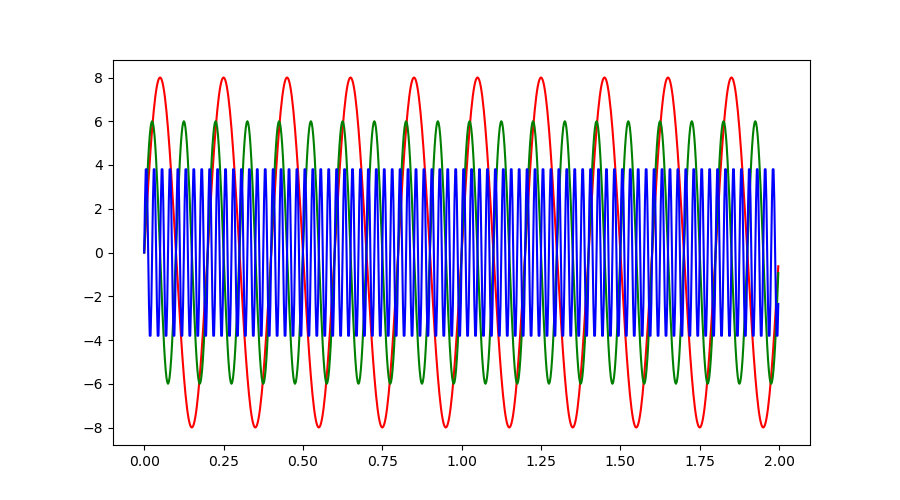

In [19]:
plt.figure(figsize=(9, 5))
plt.plot(tempo, sinal_parc_list[0], color='r')
plt.plot(tempo, sinal_parc_list[1], color='g')
plt.plot(tempo, sinal_parc_list[2], color='b')

plt.show()

<IPython.core.display.Javascript object>


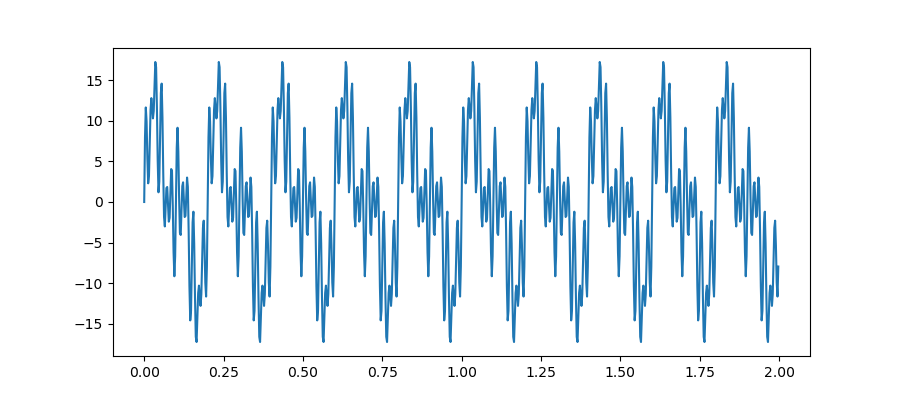

In [20]:
plt.figure(figsize=(9, 4))
plt.plot(tempo, sinal)
plt.show()

## Calculando a Transformada de Fourier do sinal

<IPython.core.display.Javascript object>


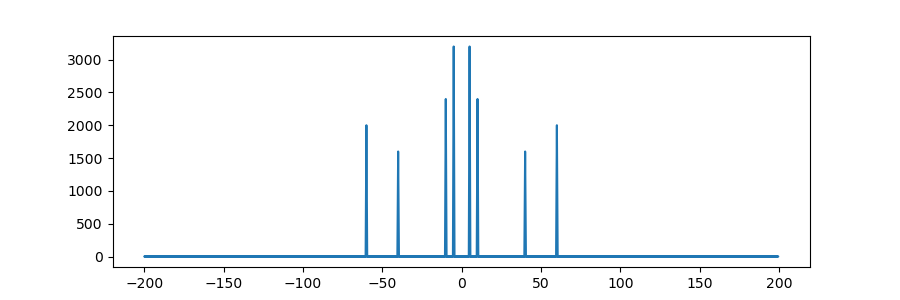

In [21]:
sinal_fft_y = fft.fft(sinal)
sinal_fft_x = fft.fftfreq(num_amostras, freq_amostragem)

plt.figure(figsize=(9, 3))
plt.plot(sinal_fft_x, np.abs(sinal_fft_y))
plt.show()

### Filtrando as altas frequencias (filtragem passa-baixa)

<IPython.core.display.Javascript object>


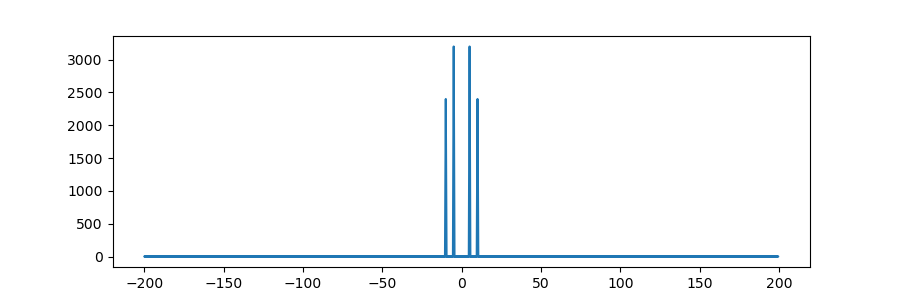

In [22]:
sinal_pb = sinal_fft_y.copy()
sinal_pb[np.abs(sinal_fft_x) > 30] = 0

plt.figure(figsize=(9, 3))
plt.plot(sinal_fft_x, np.abs(sinal_pb))
plt.show()

<IPython.core.display.Javascript object>


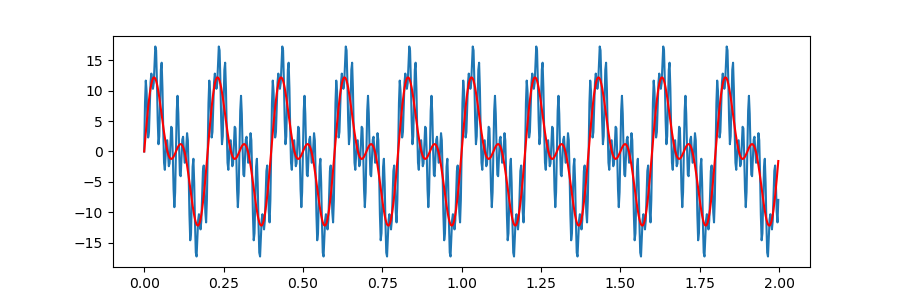

C:\Users\joaof\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [23]:
sinal_pb_ifft = fft.ifft(sinal_pb)

plt.figure(figsize=(9, 3))
plt.plot(tempo, sinal)
plt.plot(tempo, sinal_pb_ifft, color='red')
plt.show()

### Filtrando as baixas frequencias (filtragem passa-alta)

<IPython.core.display.Javascript object>


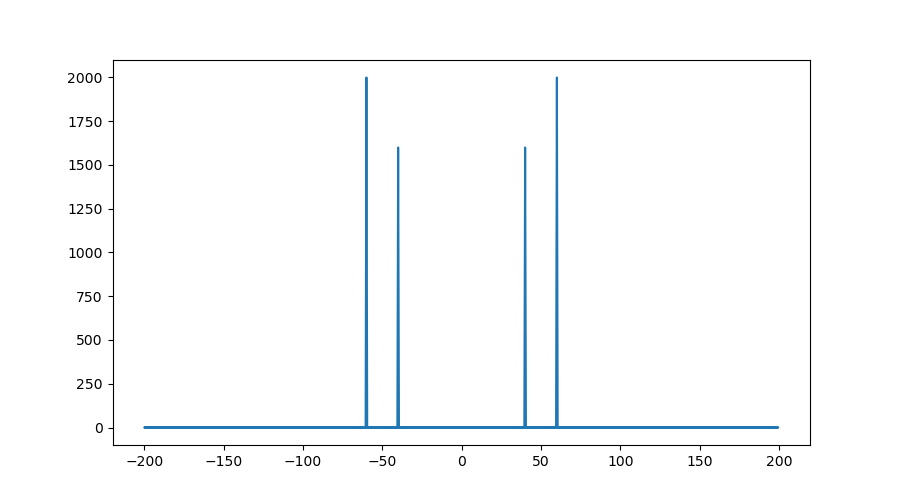

In [24]:
sinal_pa = sinal_fft_y.copy()
sinal_pa[np.abs(sinal_fft_x) < 30] = 0

plt.figure(figsize=(9, 5))
plt.plot(sinal_fft_x, np.abs(sinal_pa))
plt.show()

<IPython.core.display.Javascript object>


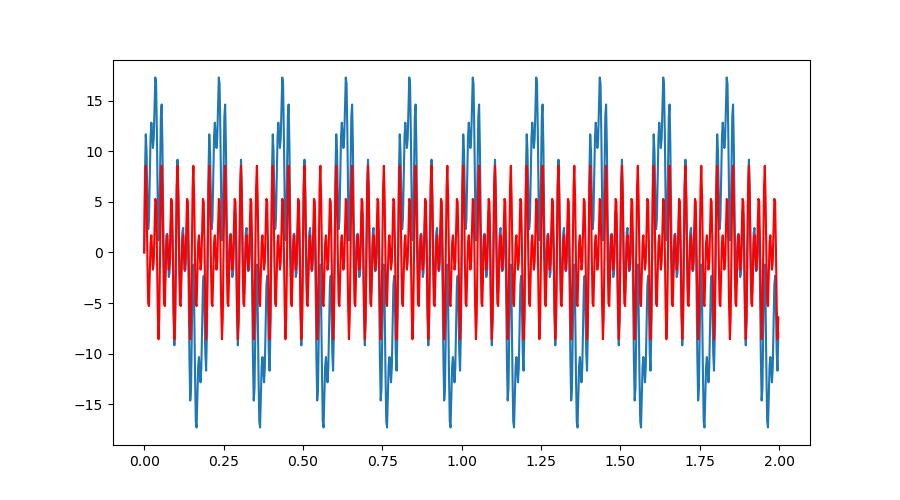

C:\Users\joaof\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [25]:
sinal_pa_ifft = fft.ifft(sinal_pa)

plt.figure(figsize=(9, 5))
plt.plot(tempo, sinal)
plt.plot(tempo, sinal_pa_ifft, color='red')
plt.show()

## Bibliografia
----

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * Disponível para download no site do autor (Exclusivo para uso pessoal)
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

* GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * Disponível em: http://scipy-lectures.org/

* scikit-image. Documentação.
    * https://scikit-image.org/docs/dev/index.html

* NumPy. Documentação.
    * https://numpy.org/doc/stable/
    
* Plotting and manipulating FFTs for filtering
    * https://scipy-lectures.org/intro/scipy/auto_examples/plot_fftpack.html
    
* https://towardsdatascience.com/fast-fourier-transform-937926e591cb

* Understanding the FFT Algorithm 
    * https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
    
* Digital Image Processing using Fourier Transform in Python
    * https://medium.com/@hicraigchen/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82